The National Taxonomy of Exempt Entities (NTEE) classification system was developed by the National Center for Charitable Statistics to classify nonprofit organizations. 
It has 26 major categories:

A - Arts, Culture & Humanities

B - Education

C - Environment

D - Animal-Related

E - Health Care

F - Mental Health & Crisis Intervention

G - Voluntary Health Associations & Medical Disciplines

H - Medical Research

I - Crime & Legal-Related

J - Employment

K - Food, Agriculture & Nutrition

L - Housing & Shelter

M - Public Safety, Disaster Preparedness & Relief

N - Recreation & Sports

O - Youth Development

P - Human Services

Q - International, Foreign Affairs & National Security

R - Civil Rights, Social Action & Advocacy

S - Community Improvement & Capacity Building

T - Philanthropy, Voluntarism & Grantmaking Foundations

U - Science & Technology

V - Social Science

W - Public & Societal Benefit

X - Religion-Related

Y - Mutual & Membership Benefit

Z - Unknown

In the tax documents, IRS asks nonprofits to self-report their NTEE code. However, each year about 20% of the organizations either fail to report their type, or report unknown type. And the purpose of this memo is to infer nonprofits' NTEE type from their mission statements.  

In [1]:
import numpy as np
import random
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nltk import word_tokenize, pos_tag
import re
from nltk.corpus import stopwords

import my own python pipeline, https://github.com/yuxiaosun/capp-455136/tree/master/mlpipe

In [3]:
import os
os.chdir('/home/sam/capp-455136')
from mlpipe import *

1.Prepare Data

In [4]:
df=pd.read_csv('missions.csv')

In [5]:
df=df[df.PURPOSE.notnull()]

In [6]:
len(df)

228985

Based on weather a nonprofit is classified, I split the data into train set and test set.

In [7]:
train=df[df['NTEE(26)']!='Z'].reset_index()

In [8]:
test=df[df['NTEE(26)']=='Z'].reset_index()

In [9]:
len(train)

183135

In [10]:
len(test)

45850

2.Describe Data

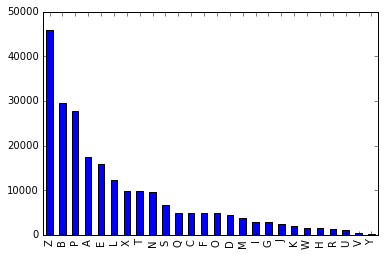

In [11]:
df['NTEE(26)'].value_counts().plot.bar()

As we can see here, in our dataset about 50,000 nonprofits have unkown NTEE type. And our purpose is to classify these nonprofits based on what we learn from the classified ones.

3.Feature Generation

In [48]:
mission=train['PURPOSE'].tolist()

In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [22]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [45]:
def tokenize_and_tag(text):
    nouns = [token for token, pos in pos_tag(word_tokenize(text)) if pos.startswith('N')]
    return nouns 

In [54]:
mission[1]

'To educate parents and congregations about how to help their children develop a relationship with God. LRM produces audio materials and delivers seminars on this topic.'

In [51]:
tokenize_and_tag(str(mission[1]))

['parents',
 'congregations',
 'children',
 'relationship',
 'God',
 'LRM',
 'materials',
 'delivers',
 'seminars',
 'topic']

In [68]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, use_idf=True, tokenizer=tokenize_and_tag, stop_words='english', ngram_range=(1,1))

%time X = tfidf_vectorizer.fit_transform(mission[:10000]) #fit the vectorizer to missions
print(X.shape)

CPU times: user 28.2 s, sys: 128 ms, total: 28.3 s
Wall time: 28.3 s
(10000, 8876)


In [ ]:
scipy.sparse.linalg.svds

In [65]:
df2=pd.DataFrame(X.A, columns=tfidf_vectorizer.get_feature_names())

In [67]:
df2.describe()

,abuse,access,activities,adults,advocacy,ages,aid,animals,area,areas,...,training,treatment,use,volunteer,welfare,women,work,world,york,youth
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.006177,0.006640,0.021526,0.011163,0.006449,0.005092,0.007466,0.009402,0.018725,0.007864,...,0.018631,0.008475,0.005913,0.009449,0.006682,0.013634,0.007746,0.011762,0.006197,0.026678
std,0.061561,0.061382,0.107737,0.077591,0.058255,0.053002,0.070574,0.080306,0.097602,0.065964,...,0.101062,0.068243,0.059699,0.079911,0.064259,0.092252,0.069138,0.084027,0.057838,0.129063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.880231,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860592,1.000000


In [ ]:
df2.to_csv('features.csv',index=False)

Display the features generated. "'s" and "'s mission" seems to be bad features, so I drop them.

In [9]:
df2=pd.read_csv('features.csv')

In [10]:
df2.columns

Index([''s', ''s mission', 'abil', 'abus', 'academ', 'access', 'achiev', 'act',
       'activ', 'adult',
       ...
       'valu', 'various', 'volunt', 'welfar', 'women', 'work', 'world', 'year',
       'young', 'youth'],
      dtype='object', length=297)

In [11]:
df2.drop(df2.columns[:2],axis=1,inplace=True)

In [12]:
df2.columns

Index(['abil', 'abus', 'academ', 'access', 'achiev', 'act', 'activ', 'adult',
       'advanc', 'advoc',
       ...
       'valu', 'various', 'volunt', 'welfar', 'women', 'work', 'world', 'year',
       'young', 'youth'],
      dtype='object', length=295)

5.Model and Evaluation

In [13]:
from __future__ import print_function
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# turn the data in a (samples, feature) matrix:
n_samples = len(train)
X = df2
y = train['NTEE(26)']

# Split the dataset in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Set the parameters by cross-validation
parameters = {'n_neighbors': [5,10,25,50,100],'weights': ['uniform','distance'],
              'algorithm': ['auto','ball_tree','kd_tree']}

scores = ['accuracy','f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3), param_grid=parameters, scoring=score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full training set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy



In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

L=3
X, y = make_multilabel_classification(n_classes=L, n_labels=2,
                                  allow_unlabeled=True,
                                  random_state=1, return_indicator=True)    
model_to_set = OneVsRestClassifier(SVC())

parameters = {
    "estimator__C": [1,2,4,8],
    "estimator__degree":[1, 2, 3, 4],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring='f1')

model_tunning.fit(df2, df['NTEE(26)'])

print model_tunning.best_score_
print model_tunning.best_params_

In [ ]:
Conclusion
